<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCTION" data-toc-modified-id="INTRODUCTION-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCTION</a></span></li><li><span><a href="#MAPS" data-toc-modified-id="MAPS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MAPS</a></span><ul class="toc-item"><li><span><a href="#Import-and-Clean-the-Dataset" data-toc-modified-id="Import-and-Clean-the-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import and Clean the Dataset</a></span></li><li><span><a href="#Incidents-Where-Arrents-were-Made" data-toc-modified-id="Incidents-Where-Arrents-were-Made-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Incidents Where Arrents were Made</a></span><ul class="toc-item"><li><span><a href="#Map-of-narcotics-incidents-(#1-in-arrested-cases)" data-toc-modified-id="Map-of-narcotics-incidents-(#1-in-arrested-cases)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Map of narcotics incidents (#1 in arrested-cases)</a></span></li><li><span><a href="#Map-of-battery-incidents-(#2-in--arrested-cases)" data-toc-modified-id="Map-of-battery-incidents-(#2-in--arrested-cases)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Map of battery incidents (#2 in  arrested-cases)</a></span></li><li><span><a href="#Map-of-weapons-violation-incidents-(#3-in-arrested-cases)" data-toc-modified-id="Map-of-weapons-violation-incidents-(#3-in-arrested-cases)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Map of weapons violation incidents (#3 in arrested-cases)</a></span></li><li><span><a href="#Map-with-the-descriptions-of-the-incidents" data-toc-modified-id="Map-with-the-descriptions-of-the-incidents-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Map with the descriptions of the incidents</a></span></li><li><span><a href="#Map-that-groups-the-markers-into-clusters" data-toc-modified-id="Map-that-groups-the-markers-into-clusters-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Map that groups the markers into clusters</a></span></li></ul></li></ul></li></ul></div>

# INTRODUCTION

Using a dataset from Chicago Data Portal, incidents of crime reported in Chicago in 2020 were analyzed. The dataset was obtained from Chicago Data Portal: 

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

In this Notebook, several maps were created by using Folum. 
Specififically: 
1. Maps that show the locations of top 3 types of incidents (Narcotics, Battery, and Weapons violation)
2. Map that shows descriptions of the incidents as popups
3. Map that groups the markes into clusters

NOTE: maps rendered by Folium cannot be displayed on Github. Therefore, images of each map were put on this Notebook. Please go to "nbviewer" (https://nbviewer.jupyter.org/) and enter this notebook's URL to see the maps. 


# MAPS

## Import and Clean the Dataset

In [23]:
import numpy as np  
import pandas as pd 

In [24]:
df_incidents = pd.read_csv('Crimes 2020.csv')

df_incidents.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12016034,JD193556,1/1/2020 0:00,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,32.0,22.0,11,1160263.0,1912391.0,2020,3/26/2020 15:45,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,12220321,JD430436,1/1/2020 0:00,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 15:45,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,12013828,JD191019,1/1/2020 0:00,044XX S LAVERGNE AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,22.0,56.0,2,1143770.0,1874726.0,2020,3/28/2020 15:47,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,12019692,JD197444,1/1/2020 0:00,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,47.0,6.0,11,1164983.0,1921507.0,2020,4/1/2020 15:50,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,12036792,JD216459,1/1/2020 0:00,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,18.0,66.0,11,1157290.0,1856526.0,2020,4/29/2020 15:53,41.762067,-87.699077,"(41.762066981, -87.699077348)"


In [25]:
# Any rows that do not have values in Latitude and Longnitude columns must be deleted in order to make a map in later analyses
# Replace empty values with NaN

df_incidents.replace("", np.nan, inplace = True)

In [26]:
# Count the number of NaN in each column

df_incidents.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1112
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       9
Community Area             1
FBI Code                   0
X Coordinate            1341
Y Coordinate            1341
Year                       0
Updated On                 0
Latitude                1341
Longitude               1341
Location                1341
dtype: int64

In [27]:
# Drop rows that have NaN values in Latitude and Longitude columns 

df_incidents.dropna(subset=["Latitude", "Longitude"], axis=0, inplace=True)

df_incidents.reset_index(drop=True, inplace=True)

# Check the shape of the df 

df_incidents.shape

(207525, 22)

In [28]:
# Check the numbers of incidents by types 

df_incidents['Primary Type'].value_counts()

BATTERY                              41390
THEFT                                40042
CRIMINAL DAMAGE                      24651
ASSAULT                              18193
DECEPTIVE PRACTICE                   16319
OTHER OFFENSE                        12335
MOTOR VEHICLE THEFT                   9899
BURGLARY                              8686
WEAPONS VIOLATION                     8419
ROBBERY                               7861
NARCOTICS                             7259
CRIMINAL TRESPASS                     4149
OFFENSE INVOLVING CHILDREN            1846
PUBLIC PEACE VIOLATION                1264
CRIMINAL SEXUAL ASSAULT               1079
SEX OFFENSE                            908
HOMICIDE                               784
INTERFERENCE WITH PUBLIC OFFICER       653
ARSON                                  579
PROSTITUTION                           273
STALKING                               191
INTIMIDATION                           161
CONCEALED CARRY LICENSE VIOLATION      147
LIQUOR LAW 

## Incidents Where Arrents were Made

In [29]:
# Select incidents where arrests were made

df_arrest = df_incidents.query('Arrest == True')
df_arrest.reset_index(inplace=True)
df_arrest.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,25,12069817,JD254448,1/1/2020 0:00,057XX S MARSHFIELD AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,True,...,16.0,67.0,08A,1166322.0,1866649.0,2020,6/24/2020 15:47,41.789658,-87.665686,"(41.789658285, -87.665685774)"
1,42,12118034,JD308225,1/1/2020 0:00,057XX W WAVELAND AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),True,...,36.0,15.0,17,1137458.0,1924022.0,2020,8/21/2020 15:51,41.947664,-87.770143,"(41.947664094, -87.770142819)"
2,83,11938113,JD100039,1/1/2020 0:05,056XX S CAMPBELL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,15.0,63.0,08B,1160665.0,1867237.0,2020,1/8/2020 15:49,41.791391,-87.686412,"(41.791390513, -87.686412149)"
3,84,11939170,JD100033,1/1/2020 0:05,090XX S MUSKEGON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,10.0,46.0,08B,1196581.0,1845642.0,2020,7/24/2020 15:46,41.731315,-87.555433,"(41.731315227, -87.555433457)"
4,86,11939185,JD100012,1/1/2020 0:10,052XX W BLOOMINGDALE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,37.0,25.0,08B,1140968.0,1911463.0,2020,1/8/2020 15:49,41.913137,-87.757551,"(41.913136893, -87.757550744)"


In [30]:
# There are 32,993 incidents where arrests were made 
# Note: Incidents that did not have latitude and longitude data are not included

df_arrest.shape

(32993, 23)

### Map of narcotics incidents (#1 in arrested-cases)

In [31]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [32]:
df_arrest_n=df_arrest[df_arrest["Primary Type"]=="NARCOTICS"]
df_arrest_n.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
15,128,11938120,JD100067,1/1/2020 0:54,043XX W WEST END AVE,2020,NARCOTICS,POSS: AMPHETAMINES,STREET,True,...,28.0,26.0,18,1147614.0,1900625.0,2020,1/8/2020 15:49,41.883271,-87.733413,"(41.883271242, -87.733413002)"
57,298,11938389,JD100264,1/1/2020 4:26,067XX S SOUTH SHORE DR,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,5.0,43.0,18,1193387.0,1860848.0,2020,1/8/2020 15:49,41.773120,-87.566638,"(41.773120341, -87.566637641)"
65,366,11938367,JD100403,1/1/2020 7:32,040XX W LAWRENCE AVE,2031,NARCOTICS,POSS: METHAMPHETAMINES,DRUG STORE,True,...,39.0,14.0,18,1148714.0,1931595.0,2020,1/8/2020 15:49,41.968235,-87.728572,"(41.968234567, -87.728571616)"
74,434,11949892,JD100448,1/1/2020 9:29,033XX W CONGRESS PKWY,2024,NARCOTICS,POSS: HEROIN(WHITE),VACANT LOT/LAND,True,...,28.0,27.0,18,1153948.0,1897493.0,2020,1/22/2020 15:50,41.874553,-87.710238,"(41.874552849, -87.710237503)"
83,516,11938638,JD100587,1/1/2020 12:11,052XX W ADDISON ST,2027,NARCOTICS,POSS: CRACK,ALLEY,True,...,30.0,15.0,18,1140858.0,1923435.0,2020,1/8/2020 15:49,41.945991,-87.757660,"(41.945991325, -87.75765956)"


In [33]:
# Limit the numeber of cases to 300

limit = 300
df_arrest_n300 = df_arrest_n.iloc[0:limit, :]
df_arrest_n300.shape

(300, 23)

In [34]:
latitude = 41.8781
longitude = -87.6298

chicago_map = folium.Map(location=[latitude, longitude], zoom_start=12)

chicago_map

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_arrest_n300.Latitude, df_arrest_n300.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # Define the size of the circles
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
          
        )
    )


chicago_map.add_child(incidents)

Image of the Map

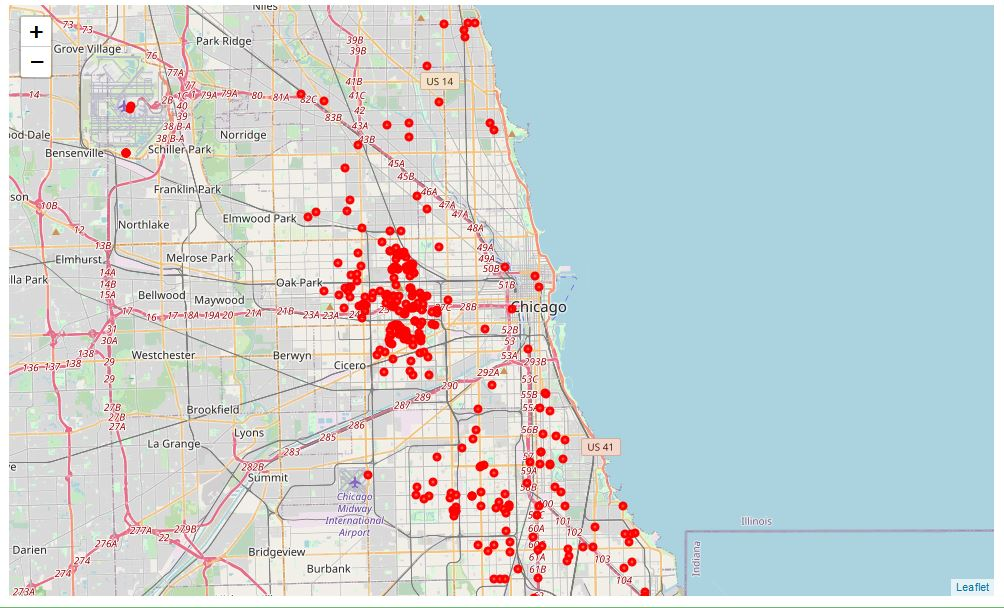




### Map of battery incidents (#2 in  arrested-cases)

In [35]:
df_arrest_b=df_arrest[df_arrest["Primary Type"]=="BATTERY"]
df_arrest_b.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2,83,11938113,JD100039,1/1/2020 0:05,056XX S CAMPBELL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,15.0,63.0,08B,1160665.0,1867237.0,2020,1/8/2020 15:49,41.791391,-87.686412,"(41.791390513, -87.686412149)"
3,84,11939170,JD100033,1/1/2020 0:05,090XX S MUSKEGON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,10.0,46.0,08B,1196581.0,1845642.0,2020,7/24/2020 15:46,41.731315,-87.555433,"(41.731315227, -87.555433457)"
4,86,11939185,JD100012,1/1/2020 0:10,052XX W BLOOMINGDALE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,37.0,25.0,08B,1140968.0,1911463.0,2020,1/8/2020 15:49,41.913137,-87.757551,"(41.913136893, -87.757550744)"
7,100,11938097,JD100028,1/1/2020 0:24,047XX N ST LOUIS AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,33.0,14.0,08B,1152197.0,1931235.0,2020,1/8/2020 15:49,41.967179,-87.715774,"(41.967178526, -87.715774293)"
8,102,11938107,JD100029,1/1/2020 0:28,022XX N LINCOLN AVE,460,BATTERY,SIMPLE,SIDEWALK,True,...,43.0,7.0,08B,1171562.0,1915205.0,2020,1/8/2020 15:49,41.922787,-87.645045,"(41.922786529, -87.645045119)"


In [36]:
# Limit the numeber of cases to 300

df_arrest_b300 = df_arrest_b.iloc[0:limit, :]
df_arrest_b300.shape

(300, 23)

In [37]:
chicago_map2 = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents2 = folium.map.FeatureGroup()

for lat, lng, in zip(df_arrest_b300.Latitude, df_arrest_b300.Longitude):
    incidents2.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # Define the size of the circles
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
          
        )
    )


chicago_map2.add_child(incidents2)

Image of the map:

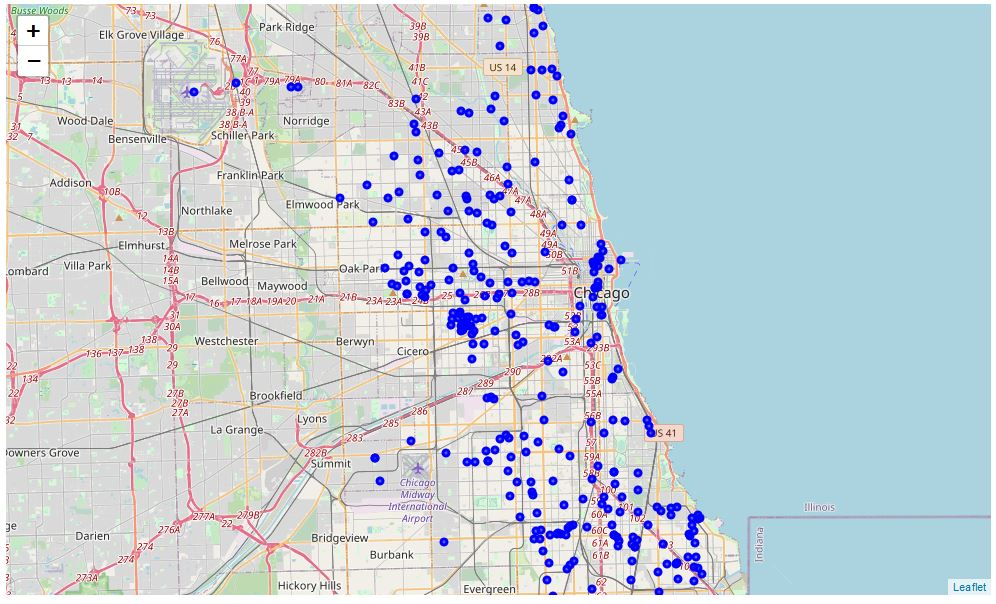

### Map of weapons violation incidents (#3 in arrested-cases)

In [38]:
df_arrest_w=df_arrest[df_arrest["Primary Type"]=="WEAPONS VIOLATION"]
df_arrest_w.head()

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
5,88,11938241,JD100062,1/1/2020 0:11,013XX N BOSWORTH AVE,141A,WEAPONS VIOLATION,UNLAWFUL USE HANDGUN,STREET,True,...,2.0,24.0,15,1165841.0,1909062.0,2020,1/8/2020 15:49,41.906054,-87.666241,"(41.906053833, -87.666241411)"
6,97,11938478,JD100051,1/1/2020 0:17,015XX N SPAULDING AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,...,26.0,23.0,15,1154071.0,1910195.0,2020,1/8/2020 15:49,41.909406,-87.709447,"(41.90940592, -87.709446801)"
10,114,11938098,JD100042,1/1/2020 0:39,131XX S RHODES AVE,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE,True,...,9.0,54.0,15,1182028.0,1818307.0,2020,1/8/2020 15:49,41.656653,-87.609587,"(41.656652846, -87.609587255)"
11,117,11938208,JD100080,1/1/2020 0:44,020XX W 51ST ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,...,15.0,61.0,15,1163738.0,1870845.0,2020,1/8/2020 15:49,41.801227,-87.675043,"(41.801227307, -87.675042729)"
12,119,11938127,JD100082,1/1/2020 0:45,038XX W GLADYS AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,...,28.0,26.0,15,1150764.0,1898079.0,2020,1/8/2020 15:49,41.876224,-87.721913,"(41.876223731, -87.721912515)"


In [39]:
#Limit the numeber of cases to 300

df_arrest_w300 = df_arrest_w.iloc[0:limit, :]
df_arrest_w300.shape

(300, 23)

In [40]:
chicago_map3 = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents3 = folium.map.FeatureGroup()

for lat, lng, in zip(df_arrest_w300.Latitude, df_arrest_w300.Longitude):
    incidents3.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=3, # Define the size of the circles
            color='#126912',
            fill=True,
            fill_color='#126912',
            fill_opacity=1
          
        )
    )


chicago_map3.add_child(incidents3)

Image of the map:

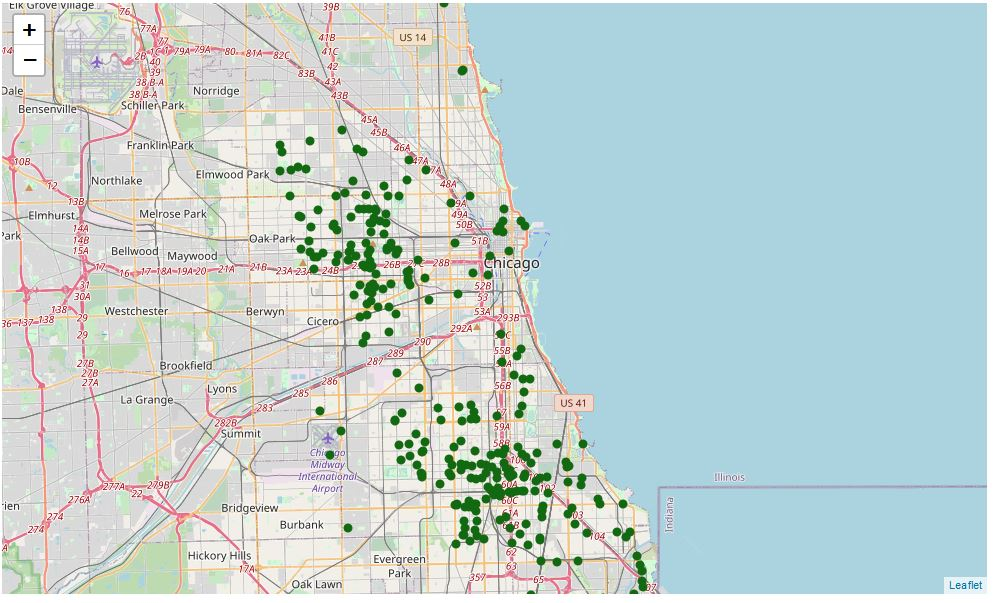

### Map with the descriptions of the incidents  


I created a map that shows the descriptions of the incidents as popus. If you click a marker, a description will appear. 

NOTE: Due to the huge size of the original data, the number of incidents was imited to 500 

In [45]:
# Limit the number of incidents to 500

limit = 500
df_arrest_500 = df_arrest.iloc[0:limit, :]
df_arrest_500.shape

(500, 23)

In [46]:
# Change the name of a column [Primary Type] into a simpe name [Types]---the column will be used to create a map below 

df_arrest_500.rename(columns={'Primary Type': 'Types'}, inplace=True)
df_arrest_500.head()

C:\Users\micha\anaconda3\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,index,ID,Case Number,Date,Block,IUCR,Types,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,25,12069817,JD254448,1/1/2020 0:00,057XX S MARSHFIELD AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,True,...,16.0,67.0,08A,1166322.0,1866649.0,2020,6/24/2020 15:47,41.789658,-87.665686,"(41.789658285, -87.665685774)"
1,42,12118034,JD308225,1/1/2020 0:00,057XX W WAVELAND AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,OTHER (SPECIFY),True,...,36.0,15.0,17,1137458.0,1924022.0,2020,8/21/2020 15:51,41.947664,-87.770143,"(41.947664094, -87.770142819)"
2,83,11938113,JD100039,1/1/2020 0:05,056XX S CAMPBELL AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,15.0,63.0,08B,1160665.0,1867237.0,2020,1/8/2020 15:49,41.791391,-87.686412,"(41.791390513, -87.686412149)"
3,84,11939170,JD100033,1/1/2020 0:05,090XX S MUSKEGON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,10.0,46.0,08B,1196581.0,1845642.0,2020,7/24/2020 15:46,41.731315,-87.555433,"(41.731315227, -87.555433457)"
4,86,11939185,JD100012,1/1/2020 0:10,052XX W BLOOMINGDALE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,37.0,25.0,08B,1140968.0,1911463.0,2020,1/8/2020 15:49,41.913137,-87.757551,"(41.913136893, -87.757550744)"


In [47]:
chicago_map4 = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_arrest_500.Latitude, df_arrest_500.Longitude, df_arrest_500.Types):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, 
        color='#cc780a',
        fill=True,
        popup=label,
        fill_color='#cc780a',
        fill_opacity=0.6
    ).add_to(chicago_map4)


chicago_map4

Image of the map

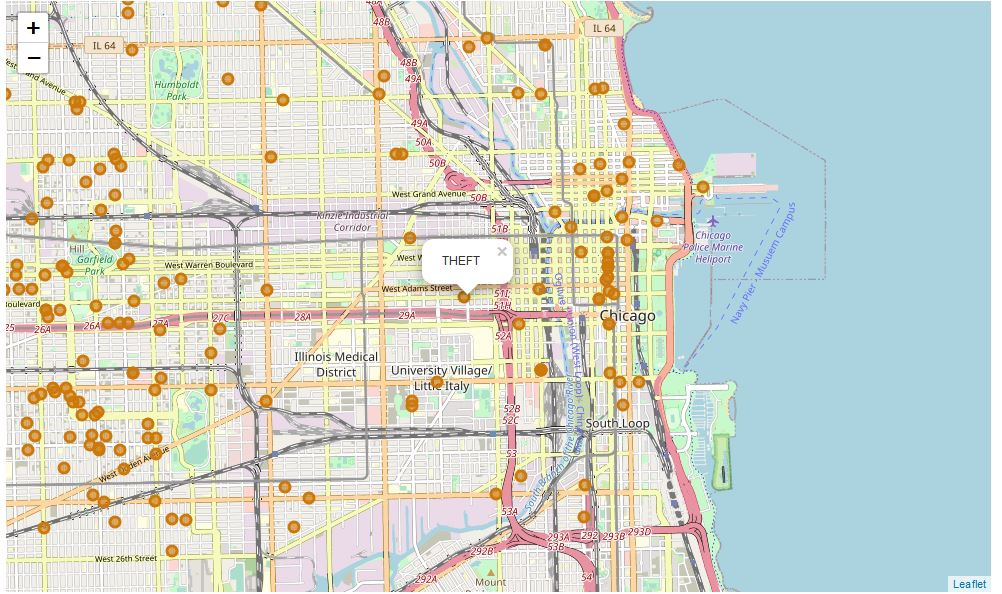

### Map that groups the markers into clusters

In [48]:
from folium import plugins

chicago_map5 = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents5 = plugins.MarkerCluster().add_to(chicago_map5)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_arrest_500.Latitude, df_arrest_500.Longitude, df_arrest_500.Types):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents5)

# display map
chicago_map5

Image of the map:

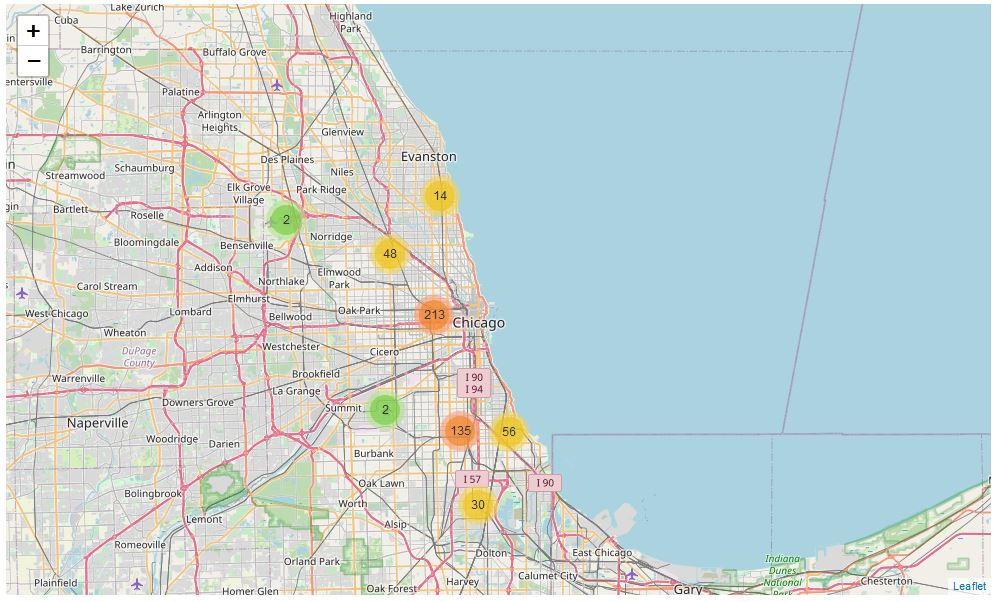